In [4]:
using Pkg
Pkg.instantiate()
using Turing
using StatsPlots
using DataFrames
using Logging
using CSV

# setting default attributes for plots
default(labels=false)

Code 0.1

In [5]:
println("All models are wrong, but some are useful!")#＼ｎ

All models are wrong, but some are useful!


Code 0.2

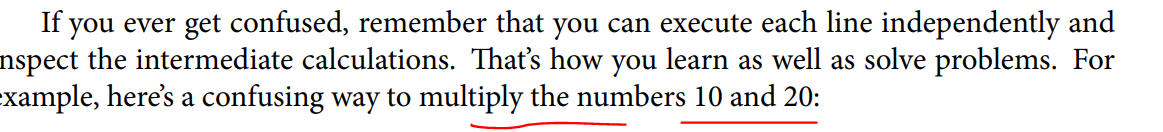

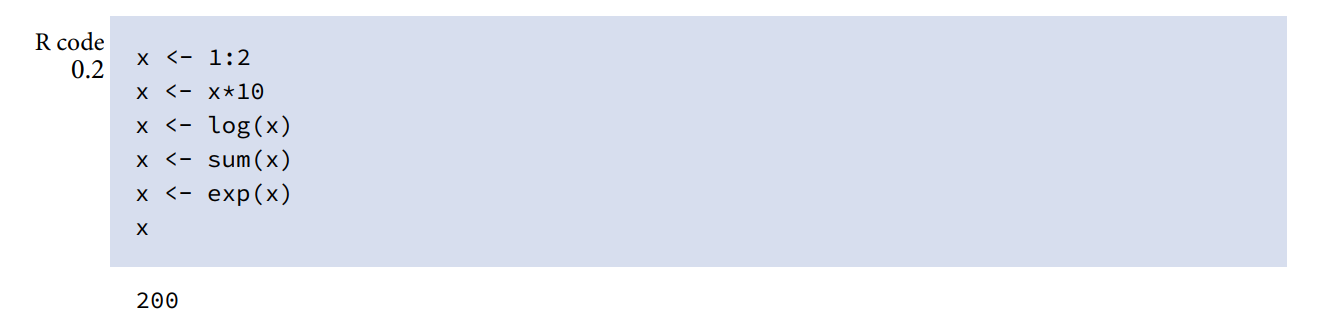

In [3]:
x = range(1, 2, length=2)
x = x .* 10 .|> log |> sum |> exp
x 

200.0000000000001

Code 0.3

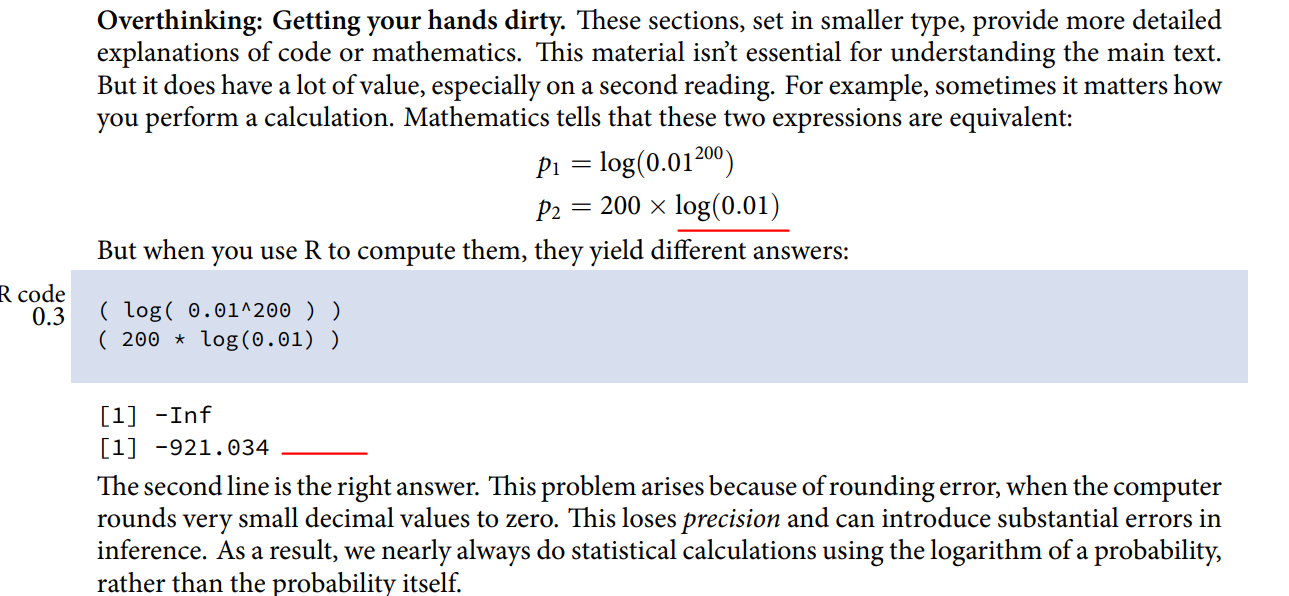

In [4]:
[
    log(0.01^200); 
    200 * log(0.01)
]

2-element Vector{Float64}:
  -Inf
 -921.0340371976182

# An example

for a simple linear regression using Turing

Code 0.4

In [26]:
#using CSV
# load data
#df = CSV.read("data/cars.csv")
df = DataFrame(CSV.File("data/cars.csv"));

In [27]:
first(df,5)

,Column1,speed,dist
,Int64,Int64,Int64
1,1,4,2
2,2,4,10
3,3,7,4
4,4,7,22
5,5,8,16


In [28]:
# fit a linear regression on distance on speed
@model function speed_dist(speed, dist)
    a ~ Uniform(-20, 20)
    b ~ Uniform(1, 5)
    m = a .+ b * speed
    dist ~ MvNormal(m, 1)
end

Logging.disable_logging(Logging.Warn)
chain = sample(speed_dist(df.speed, df.dist), NUTS(0.65), 1000)
display(chain)

Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.21 seconds
Compute duration  = 1.21 seconds
parameters        = a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std   naive_se      mcse        ess      rhat    ⋯
      Symbol    Float64   Float64    Float64   Float64    Float64   Float64    ⋯

           a   -17.5607    0.4323     0.0137    0.0243   226.0956    1.0071    ⋯
           b     3.9317    0.0269     0.0009    0.0016   227.6517    1.0051    ⋯
                                                                1 column omitted

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 

 

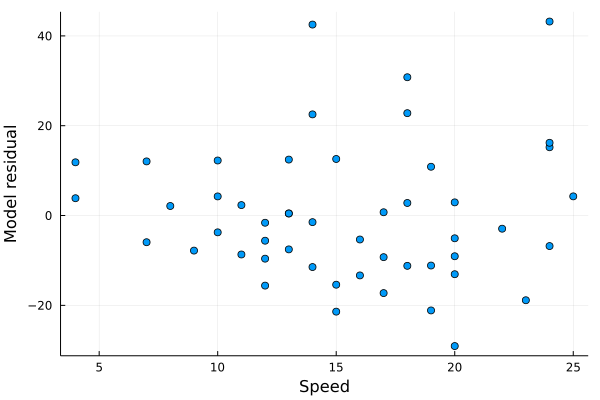

In [25]:
# extract mean params
mean_a, mean_b = mean(chain)[:,:mean]

# get residuals of the data
resid = df.dist - (mean_a .+ mean_b * df.speed);
scatter(df.speed, resid; xlabel = "Speed", ylabel = "Model residual")

In [29]:
describe(chain)

2-element Vector{ChainDataFrame}:
 Summary Statistics (2 x 8)
 Quantiles (2 x 6)

In [23]:
mean(chain)

Mean
  parameters       mean 
      Symbol    Float64 

           a   -17.6265
           b     3.9355


Code 0.5

In [6]:
#import Pkg
# this list of dependencies might be incomplete, as I'm not maintaining it.
# please check Project.toml for the full list
#Pkg.add(["Turing", "CSV", "DataFrames", "Plots", "StatsPlots", "StatisticalRethinking"])

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `~/work/rethinking/rethinking-2ed-julia/Project.toml`
  [2d09df54] ~ StatisticalRethinking v4.4.3 `https://github.com/StatisticalRethinkingJulia/StatisticalRethinking.jl#master` ⇒ v4.4.3
    Updating `~/work/rethinking/rethinking-2ed-julia/Manifest.toml`
  [2d09df54] ~ StatisticalRethinking v4.4.3 `https://github.com/StatisticalRethinkingJulia/StatisticalRethinking.jl#master` ⇒ v4.4.3
